## Stroke Prediction
### Data Dictionary:
1. id: unique identifier
2.  gender: "Male", "Female" or "Other"
3. age: age of the patient
4. hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
5. heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
6. ever_married: "No" or "Yes"
7. work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
8. Residence_type: "Rural" or "Urban"
9. avg_glucose_level: average glucose level in blood
10. bmi: body mass index
11. smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*
12. stroke: 1 if the patient had a stroke or 0 if not

###Import the necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Mount the google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Load the dataset

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/healthcare-dataset-stroke-data.csv')
df

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


### Data cleaning

In [ ]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

<ipython-input-7-d2ecb5bc074d>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data=df.corr()


<Axes: >

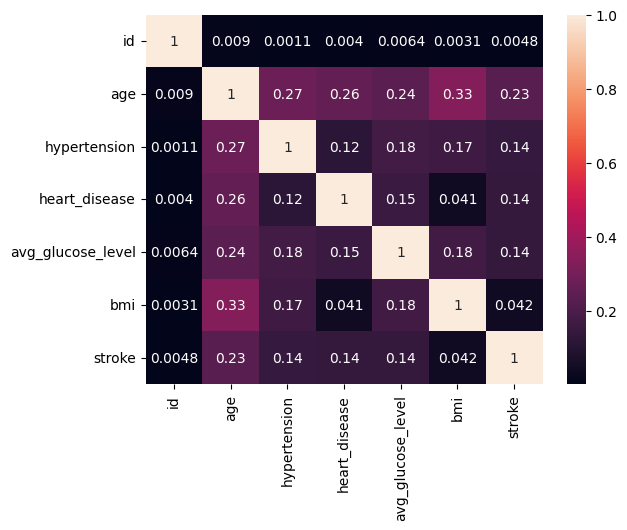

In [ ]:
# checking the correlation
import seaborn as sns
data=df.corr()
sns.heatmap(data,annot=True)

### Data Manipulation

In [ ]:
df['gender'].value_counts()

Female    2897
Male      2011
Other        1
Name: gender, dtype: int64

<Axes: >

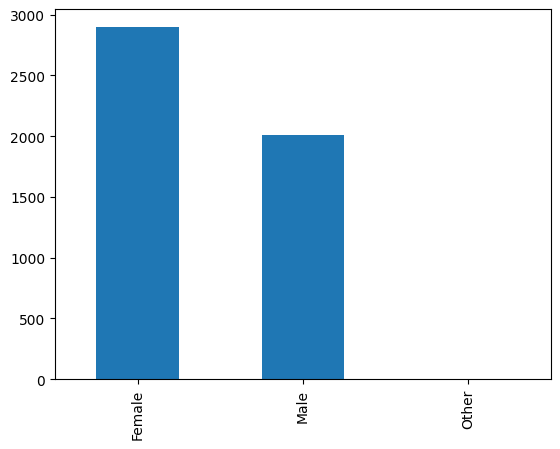

In [ ]:
plt.figsize=(6,6)
df['gender'].value_counts().plot(kind='bar')

### Age vs Stroke

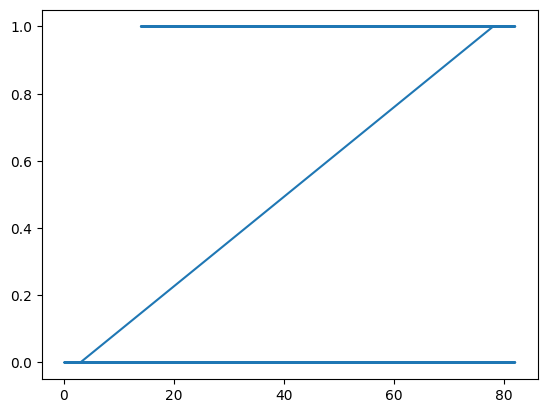

In [ ]:
plt.plot(df['age'],df['stroke'])

Text(0.5, 1.0, 'smoking status vs stroke')

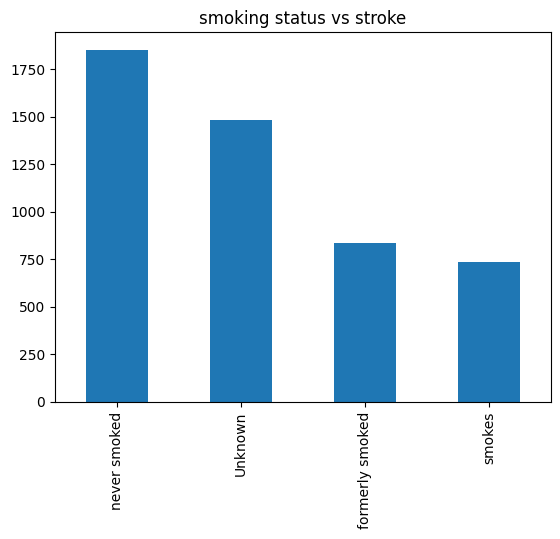

In [ ]:
# smoking status vs smoke
df['smoking_status'].value_counts().plot(kind='bar')
plt.title('smoking status vs stroke')

Text(0.5, 1.0, 'Pie Chart of Smoking Status')

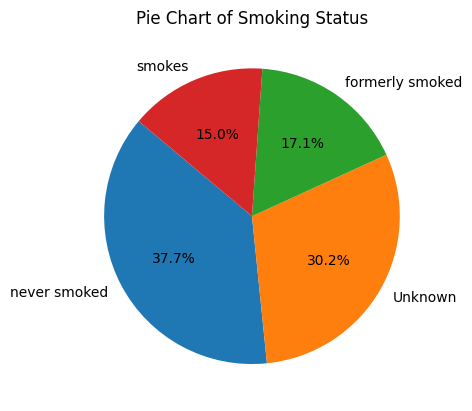

In [ ]:
value_counts = df['smoking_status'].value_counts()
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Smoking Status')


In [ ]:
ct=pd.crosstab(df['smoking_status'],df['stroke'])

Text(0.5, 1.0, 'Relation between smoking status and stroke')

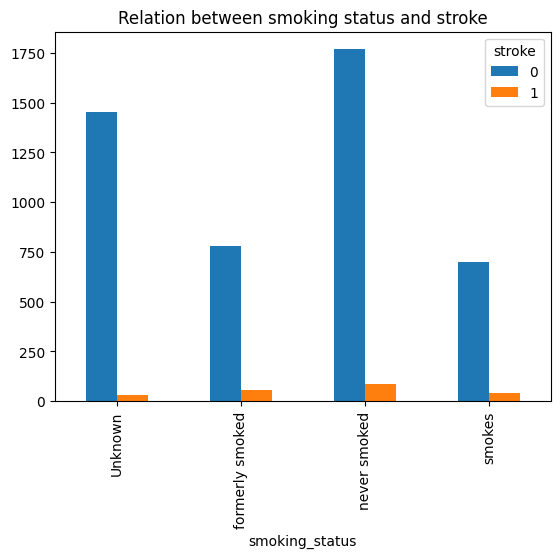

In [ ]:
plt.figsize=(4,4)
ct.plot(kind='bar')
plt.title('Relation between smoking status and stroke')

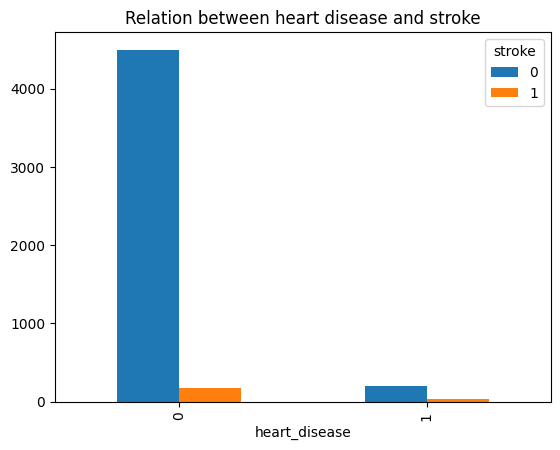

In [ ]:
sa=pd.crosstab(df['heart_disease'],df['stroke'])
sa.plot(kind='bar')
plt.title('Relation between heart disease and stroke')
plt.show()

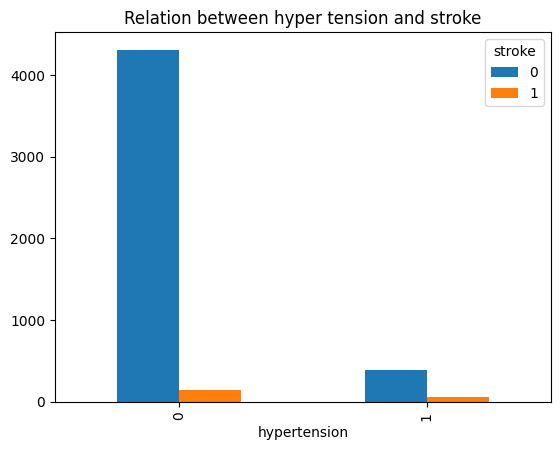

In [ ]:
sd=pd.crosstab(df['hypertension'],df['stroke'])
sd.plot(kind='bar')
plt.title('Relation between hyper tension and stroke')
plt.show()

### Data Splitting

In [ ]:
x=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values

In [ ]:
x

array([['Male', 67.0, 0, ..., 228.69, 36.6, 'formerly smoked'],
       ['Male', 80.0, 0, ..., 105.92, 32.5, 'never smoked'],
       ['Female', 49.0, 0, ..., 171.23, 34.4, 'smokes'],
       ...,
       ['Female', 35.0, 0, ..., 82.99, 30.6, 'never smoked'],
       ['Male', 51.0, 0, ..., 166.29, 25.6, 'formerly smoked'],
       ['Female', 44.0, 0, ..., 85.28, 26.2, 'Unknown']], dtype=object)

### Data Preprocessing

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

ct=ColumnTransformer(transformers=[('encoders',OneHotEncoder(),[0,4,5,6,9])],remainder='passthrough')
x=ct.fit_transform(x)
x

array([[0.0, 1.0, 0.0, ..., 1, 228.69, 36.6],
       [0.0, 1.0, 0.0, ..., 1, 105.92, 32.5],
       [1.0, 0.0, 0.0, ..., 0, 171.23, 34.4],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 82.99, 30.6],
       [0.0, 1.0, 0.0, ..., 0, 166.29, 25.6],
       [1.0, 0.0, 0.0, ..., 0, 85.28, 26.2]], dtype=object)

In [ ]:
x=np.array(x)
y=np.array(y)

In [ ]:
x.shape, y.shape

((4909, 21), (4909,))

### Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
x_train.shape, x_test.shape

((3927, 21), (982, 21))

### Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [ ]:
x_train

array([[-1.20216699,  1.20280047, -0.0159597 , ..., -0.22672808,
         0.46870619, -0.54350353],
       [-1.20216699,  1.20280047, -0.0159597 , ..., -0.22672808,
        -0.03683135, -0.47998269],
       [ 0.83183119, -0.83139309, -0.0159597 , ...,  4.41056969,
        -1.0366322 , -1.03896609],
       ...,
       [-1.20216699,  1.20280047, -0.0159597 , ..., -0.22672808,
        -0.55138831, -0.08615348],
       [-1.20216699,  1.20280047, -0.0159597 , ..., -0.22672808,
         0.84774661, -0.56891187],
       [-1.20216699,  1.20280047, -0.0159597 , ..., -0.22672808,
        -0.80821581, -0.16237849]])

### Creation of ANN Model

In [ ]:
import tensorflow as tf

In [ ]:
ann=tf.keras.models.Sequential()

#### Input Layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=5,activation='relu'))

#### Output Layer

In [ ]:
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [ ]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
ann.fit(x_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
123/123 [==============================] - 1s 2ms/step - loss: 0.6982 - accuracy: 0.5429
Epoch 2/100
123/123 [==============================] - 0s 2ms/step - loss: 0.4609 - accuracy: 0.8582
Epoch 3/100
123/123 [==============================] - 0s 2ms/step - loss: 0.3325 - accuracy: 0.9381
Epoch 4/100
123/123 [==============================] - 0s 2ms/step - loss: 0.2618 - accuracy: 0.9549
Epoch 5/100
123/123 [==============================] - 0s 2ms/step - loss: 0.2251 - accuracy: 0.9577
Epoch 6/100
123/123 [==============================] - 0s 2ms/step - loss: 0.2046 - accuracy: 0.9577
Epoch 7/100
123/123 [==============================] - 0s 2ms/step - loss: 0.1919 - accuracy: 0.9577
Epoch 8/100
123/123 [==============================] - 0s 2ms/step - loss: 0.1834 - accuracy: 0.9577
Epoch 9/100
123/123 [==============================] - 0s 2ms/step - loss: 0.1770 - accuracy: 0.9577
Epoch 10/100
123/123 [==============================] - 0s 2ms/step - loss: 0.1719 - accura

### Predicting the test set

In [ ]:
y_preds=ann.predict(x_test)

31/31 [==============================] - 0s 1ms/step


In [ ]:

y_preds

array([[3.35728028e-03],
       [1.99064873e-02],
       [6.41261935e-02],
       [9.22222808e-02],
       [6.43965378e-02],
       [9.17742401e-03],
       [2.37471089e-01],
       [3.64777334e-02],
       [2.90481665e-04],
       [1.65572099e-03],
       [1.40945107e-01],
       [1.03506213e-03],
       [6.95764029e-04],
       [7.99951318e-04],
       [3.72270405e-01],
       [3.78125900e-04],
       [4.56008017e-02],
       [3.08631659e-02],
       [1.39241107e-03],
       [1.99576002e-03],
       [1.98666472e-03],
       [3.02850967e-04],
       [1.58589222e-02],
       [5.50519268e-04],
       [6.14830479e-02],
       [5.11892661e-02],
       [2.15731692e-04],
       [2.75836064e-04],
       [2.85920426e-02],
       [6.20917126e-04],
       [5.78774884e-02],
       [1.39205600e-04],
       [3.45059368e-03],
       [6.51506009e-03],
       [1.61720477e-02],
       [1.76230003e-03],
       [3.89954099e-03],
       [3.32135782e-02],
       [1.90279016e-03],
       [1.08694818e-04],


In [ ]:
y_preds=(y_preds>0.75)
y_preds

array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [

Evaluating the ANN

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
p=(y_test>=0.5)
p

array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
       False, False, False, False, False,  True,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,

In [ ]:
accuracy_score(p,y_preds)

0.9562118126272913